In [1]:
#q1

In [ ]:
We can use Bayes' theorem to calculate the probability of an employee being a smoker given that he/she uses the health insurance plan. Let S represent the event that an employee is a smoker and H represent the event that an employee uses the health insurance plan. Then, we have:

P(S|H) = P(H|S) * P(S) / P(H)

We know that P(H) is the probability of an employee using the health insurance plan, which is given to be 0.70. We also know that P(S) is the probability of an employee being a smoker, which is not given in the problem. However, we can use the information given in the problem to calculate it:

P(S) = P(S|H) * P(H) + P(S|H') * P(H')

where H' is the event that an employee does not use the health insurance plan. We can assume that P(S|H') is much smaller than P(S|H), since smoking is likely to be correlated with health problems and the use of health insurance. Therefore, we can approximate P(S) as:

P(S) ≈ P(S|H) * P(H)

Substituting the known values, we get:

P(S) = 0.40 * 0.70 = 0.28

Now, we can substitute all the known values into Bayes' theorem to get:

P(S|H) = 0.40 * 0.70 / 0.70 = 0.40

Therefore, the probability that an employee is a smoker given that he/she uses the health insurance plan is 0.40 or 40%.


In [2]:
#q2

In [ ]:
Bernoulli Naive Bayes and Multinomial Naive Bayes are two variants of Naive Bayes classifiers, used for text classification and other discrete data problems.

The main difference between Bernoulli and Multinomial Naive Bayes is the way they handle the input features. Bernoulli Naive Bayes assumes that the input features are binary (e.g., presence or absence of a feature), while Multinomial Naive Bayes assumes that the input features represent counts of discrete data (e.g., word frequencies).

In Bernoulli Naive Bayes, the likelihood of each feature is modeled using a Bernoulli distribution, which is a binomial distribution where the number of trials is fixed at one. This means that Bernoulli Naive Bayes only considers whether each feature is present or absent in the input data.

In Multinomial Naive Bayes, the likelihood of each feature is modeled using a Multinomial distribution, which represents the count of occurrences of each feature in the input data. This means that Multinomial Naive Bayes considers the frequency of each feature in the input data.

In practice, Bernoulli Naive Bayes is often used for binary classification problems, such as spam detection, while Multinomial Naive Bayes is used for text classification tasks where the input features represent word counts or frequencies.

In [3]:
#q3

In [ ]:
Bernoulli Naive Bayes assumes that the missing values are non-occurrences, i.e., the value is assumed to be 0. 
This is because Bernoulli Naive Bayes models the presence or absence of a feature in a document, and if a feature is missing, it is considered absent. 
Therefore, the missing values are not taken into account while calculating the probabilities for the Bernoulli distribution. 
If a significant proportion of the data has missing values, it may lead to biased estimates and poor performance of the classifier. 
In such cases, imputation methods can be used to fill in the missing values.

In [4]:
#q4

In [ ]:
Yes, Gaussian Naive Bayes can be used for multi-class classification problems. It can be extended to multiple classes using the "one-vs-all" or "one-vs-one" approach. 
In the "one-vs-all" approach, a separate binary classifier is trained for each class, where the samples from that class are labeled as positive and the samples from all other classes are labeled as negative. 
In the "one-vs-one" approach, a binary classifier is trained for each pair of classes, where the samples from the two classes are labeled as positive and negative, respectively.
The final prediction is based on a voting scheme using the output of all binary classifiers.

In [5]:
#q5

In [35]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

import nltk

import seaborn as sns

from nltk.corpus import stopwords

import string

from nltk.stem import PorterStemmer

from wordcloud import WordCloud

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

ModuleNotFoundError: No module named 'nltk'

In [8]:
x = pd.read_csv("sms-spam.csv")

In [9]:
x

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [10]:
x.shape

(5572, 5)

In [11]:
x.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)


In [12]:
x

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
x.rename(columns = {'v1':'result', 'v2':'input'}, inplace=True)


In [14]:
x

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#result has categorical labels, we need to convert it into numerical values - enbcoding
#for that we will be using 'LabelEncoder' from sklearn

In [15]:
encoder = LabelEncoder()
x['result'] = encoder.fit_transform(x['result'])

#displaying the edited dataframe
x.head()

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#so 0 means no SPAM, 1 means SPAM

In [16]:
x.isnull().sum()

result    0
input     0
dtype: int64

In [17]:
x.duplicated().sum()

403

In [18]:
x = x.drop_duplicates(keep='first')

In [19]:
x

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# EDA

In [20]:
x['result'].value_counts()

0    4516
1     653
Name: result, dtype: int64

In [21]:
653*100.0/5169

12.633004449603405

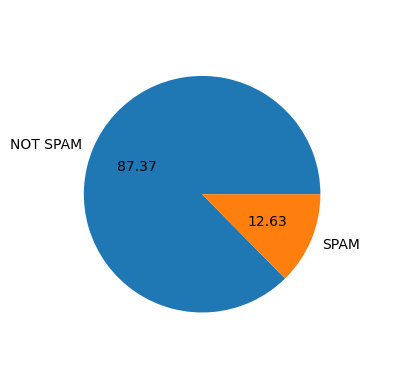

In [22]:
plt.pie(x['result'].value_counts(),  labels = ['NOT SPAM', 'SPAM'], autopct = '%0.2f', radius = 0.8)
plt.show()

In [ ]:
#hence, highly IMBALANCED DATA

In [23]:
#now we will be analysing the number of alphabets/words/sentences being used in the TEXT
#for this, will create 3 new columns: (1) no. of characters (2) no. of words (3) no. of sentences in SMS

#using 'nltk' library for this. 
#Natural Language Toolkit for text processing 
#(pip install nltk)

In [27]:
nltk.download('punkt')

NameError: name 'nltk' is not defined

In [26]:
#creating a new column with count of characters
x['countCharacters'] = x['input'].apply(len)

#creating a new column with count of words
x['countWords'] = x['input'].apply(lambda i:len(nltk.word_tokenize(i)))
#'word_tokenize' function takes a string of text as input and returns a list of words

#creating a new column with count of sentences
x['countSentences'] = x['input'].apply(lambda i:len(nltk.sent_tokenize(i)))
#'sent_tokenize' function takes a string of text as input and returns a list of sentences

/tmp/ipykernel_2179/3785843795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['countCharacters'] = x['input'].apply(len)


NameError: name 'nltk' is not defined

In [36]:
x.head()

,result,input,countCharacters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
x[['countCharacters', 'countWords', 'countSentences']].describe()

KeyError: "['countWords', 'countSentences'] not in index"

In [ ]:
## nltk module not working plz give me a solution .